# Phase III Analysis

After training our top model selection for both of our outcome measure, we analyze the relative performance of feature subsets against prior year and shallow decision tree baselines. This also includes bias analysis on our final results and memorializes charts in the final report

In [30]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

%matplotlib inline

## Model Analysis

### Load and Preprocess Data

In [31]:
top20 = pd.read_csv('../results/top20_num/phase3_results.csv')
inc20 = pd.read_csv('../results/e_num_inc_20pct/phase3_results.csv')

prefix = '(datetime.datetime('
pref_len = len(prefix)
top20['year'] = top20['testing_dates'].str.slice(start=pref_len, stop=pref_len+4)
inc20['year'] = inc20['testing_dates'].str.slice(start=pref_len, stop=pref_len+4)

In [32]:
top20.sort_values(by='auc-roc', ascending=False)

,Unnamed: 0,training_dates,testing_dates,model_key,classifier,parameters,feature_sets,outcome,model_result,auc-roc,...,r_at_30,r_at_50,f1_at_1,f1_at_2,f1_at_5,f1_at_10,f1_at_20,f1_at_30,f1_at_50,year
24,24,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min...","['demographic', 'eviction', 'tract']",top20_num,RF: feature_importances: results/csv/RF24.csv,0.957202,...,0.917878,0.988598,0.094684,0.179675,0.390151,0.623708,0.777778,0.734313,0.564919,2016
28,28,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min...","['demographic', 'economic', 'eviction', 'tract']",top20_num,RF: feature_importances: results/csv/RF28.csv,0.956891,...,0.916983,0.987853,0.094400,0.179675,0.390866,0.625696,0.778150,0.733598,0.564493,2016
10,10,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min...","['demographic', 'eviction']",top20_num,RF: feature_importances: results/csv/RF10.csv,0.956555,...,0.916760,0.987555,0.094968,0.179675,0.390032,0.623410,0.775468,0.733419,0.564323,2016
18,18,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min...","['eviction', 'tract']",top20_num,RF: feature_importances: results/csv/RF18.csv,0.956262,...,0.915046,0.988598,0.094826,0.180081,0.388839,0.623112,0.777107,0.732048,0.564919,2016
20,20,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min...","['demographic', 'economic', 'eviction']",top20_num,RF: feature_importances: results/csv/RF20.csv,0.956142,...,0.915866,0.986139,0.094684,0.179810,0.390628,0.623311,0.778821,0.732703,0.563514,2016
4,4,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min...",['eviction'],top20_num,RF: feature_importances: results/csv/RF4.csv,0.955825,...,0.914226,0.987853,0.094542,0.179539,0.390509,0.620529,0.774052,0.731392,0.564493,2016
26,26,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min...","['economic', 'eviction', 'tract']",top20_num,RF: feature_importances: results/csv/RF26.csv,0.955820,...,0.915344,0.986661,0.095110,0.179946,0.390270,0.624404,0.777703,0.732286,0.563812,2016
14,14,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min...","['economic', 'eviction']",top20_num,RF: feature_importances: results/csv/RF14.csv,0.955126,...,0.914673,0.985543,0.094684,0.179810,0.390747,0.622615,0.776362,0.731749,0.563173,2016
22,22,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min...","['demographic', 'economic', 'tract']",top20_num,RF: feature_importances: results/csv/RF22.csv,0.944765,...,0.891050,0.978985,0.093832,0.178591,0.384070,0.606518,0.753260,0.712851,0.559426,2016
12,12,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, c

In [33]:
inc20.sort_values(by='auc-roc', ascending=False)

,Unnamed: 0,training_dates,testing_dates,model_key,classifier,parameters,feature_sets,outcome,model_result,auc-roc,...,r_at_30,r_at_50,f1_at_1,f1_at_2,f1_at_5,f1_at_10,f1_at_20,f1_at_30,f1_at_50,year
24,24,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 10, 'max_features': 'sqrt', 'min...","['demographic', 'eviction', 'tract']",e_num_inc_20pct,RF: feature_importances: results/csv/RF24.csv,0.731234,...,0.493993,0.718645,0.044962,0.085289,0.183145,0.304919,0.453702,0.532346,0.592313,2016
28,28,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 10, 'max_features': 'sqrt', 'min...","['demographic', 'economic', 'eviction', 'tract']",e_num_inc_20pct,RF: feature_importances: results/csv/RF28.csv,0.730467,...,0.493171,0.715403,0.046138,0.085861,0.184280,0.304583,0.454748,0.531461,0.589641,2016
18,18,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 10, 'max_features': 'sqrt', 'min...","['eviction', 'tract']",e_num_inc_20pct,RF: feature_importances: results/csv/RF18.csv,0.729824,...,0.493042,0.716829,0.044289,0.084962,0.182994,0.306466,0.454033,0.531321,0.590817,2016
26,26,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 10, 'max_features': 'sqrt', 'min...","['economic', 'eviction', 'tract']",e_num_inc_20pct,RF: feature_importances: results/csv/RF26.csv,0.727806,...,0.491183,0.715014,0.045298,0.084717,0.181481,0.304650,0.451556,0.529319,0.589321,2016
10,10,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 10, 'max_features': 'sqrt', 'min...","['demographic', 'eviction']",e_num_inc_20pct,RF: feature_importances: results/csv/RF10.csv,0.726561,...,0.490578,0.713718,0.044121,0.083490,0.179363,0.300414,0.447208,0.528667,0.588252,2016
20,20,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 10, 'max_features': 'sqrt', 'min...","['demographic', 'economic', 'eviction']",e_num_inc_20pct,RF: feature_importances: results/csv/RF20.csv,0.725853,...,0.489282,0.712421,0.044794,0.082918,0.180800,0.301826,0.449740,0.527269,0.587183,2016
4,4,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 10, 'max_features': 'sqrt', 'min...",['eviction'],e_num_inc_20pct,RF: feature_importances: results/csv/RF4.csv,0.725040,...,0.488158,0.713847,0.042441,0.080628,0.177321,0.298463,0.447263,0.526058,0.588359,2016
14,14,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 10, 'max_features': 'sqrt', 'min...","['economic', 'eviction']",e_num_inc_20pct,RF: feature_importances: results/csv/RF14.csv,0.724556,...,0.487423,0.712248,0.044373,0.081936,0.179666,0.299741,0.447098,0.525267,0.587041,2016
29,29,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",BASELINE_DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 3}","['demographic', 'economic', 'eviction', 'tract']",e_num_inc_20pct,DT: tree_viz: results/images/tree_viz29.png,0.680871,...,0.415809,0.732129,0.000084,0.010058,0.075270,0.189045,0.342478,0.448093,0.603427,2016
5,5,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0)

### Model Performance

In [34]:
# Set common graphic features
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 14})

Text(0,0.5,'AUC ROC')

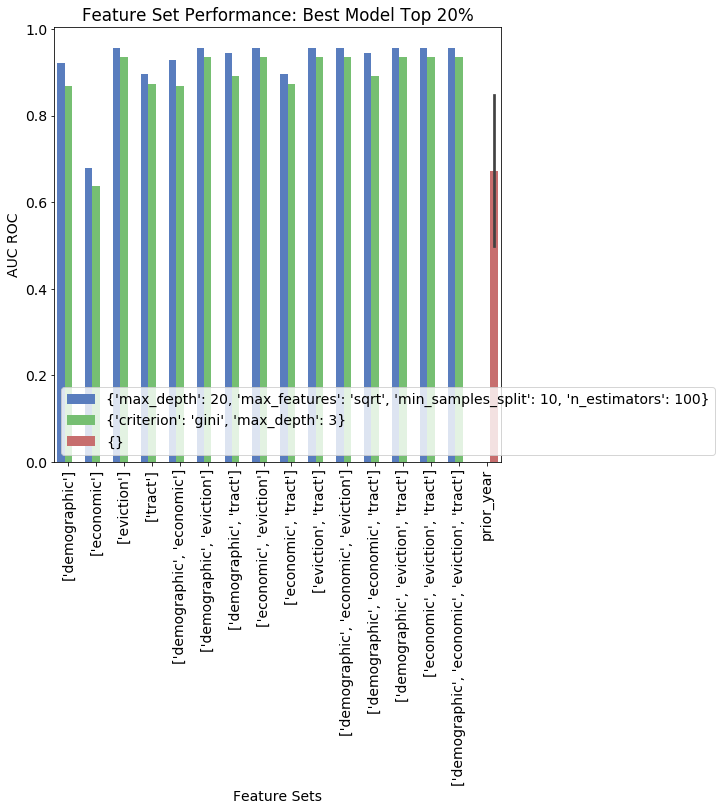

In [35]:
# Feature set performance against baseline for best model, Top 20%
sns.barplot(x='feature_sets', y='auc-roc', hue = 'parameters', data=top20, palette='muted')
plt.xticks(rotation=90)
plt.legend(loc=3)
plt.title('Feature Set Performance: Best Model Top 20%')
plt.xlabel('Feature Sets')
plt.ylabel('AUC ROC')

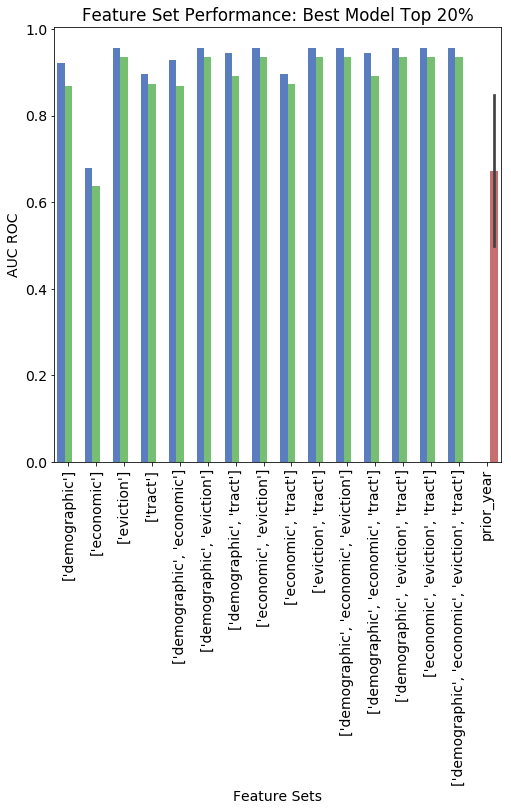

In [36]:
# Feature set performance against baseline for best model, Top 20%
sns.barplot(x='feature_sets', y='auc-roc', hue = 'parameters', data=top20, palette='muted')
plt.xticks(rotation=90)
plt.legend(loc=3)
plt.title('Feature Set Performance: Best Model Top 20%')
plt.xlabel('Feature Sets')
plt.ylabel('AUC ROC')
plt.legend().set_visible(False)

Text(0.5,1,'Feature Set Performance: Best Model >20% Increase')

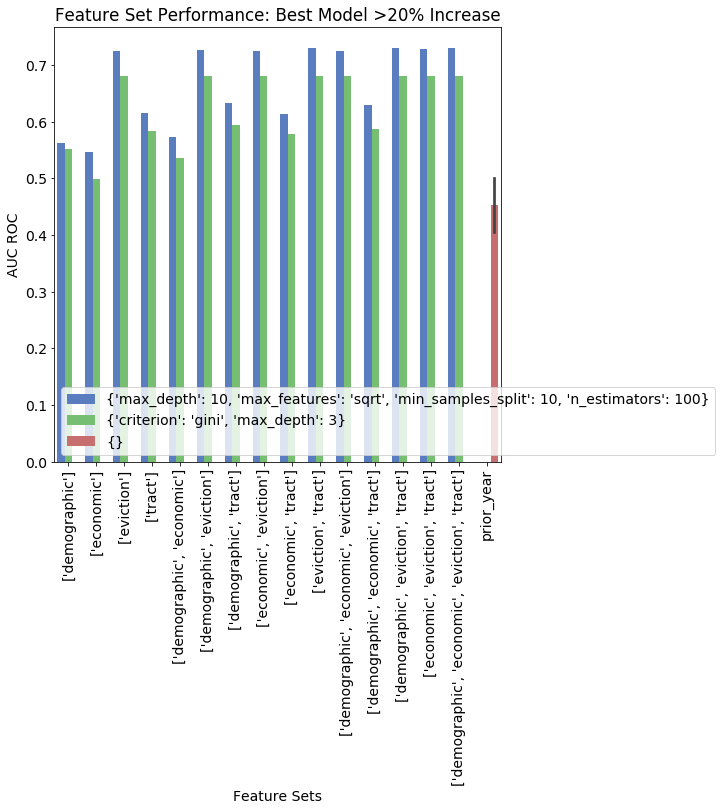

In [37]:
# Feature set performance against baseline for best model, >20% Increase
sns.barplot(x='feature_sets', y='auc-roc', hue = 'parameters', data=inc20, palette='muted')
plt.xticks(rotation=90)
plt.legend(loc=3)
plt.xlabel('Feature Sets')
plt.ylabel('AUC ROC')
plt.title('Feature Set Performance: Best Model >20% Increase')

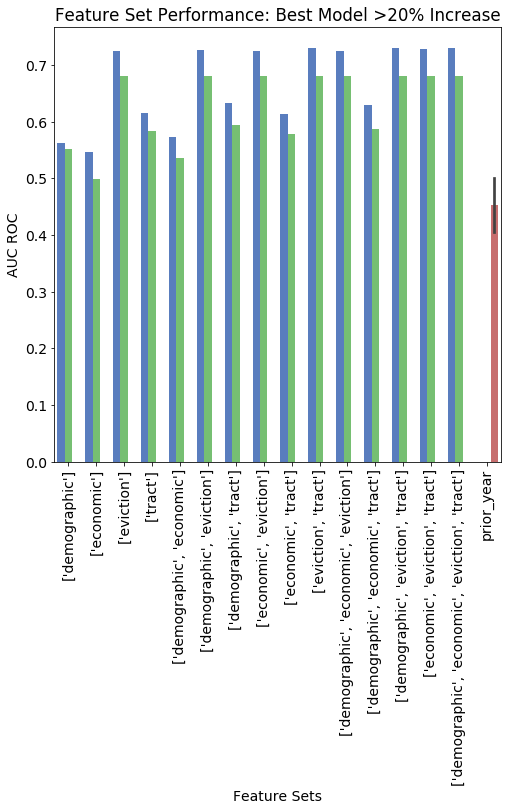

In [38]:
# Feature set performance against baseline for best model, >20% Increase
sns.barplot(x='feature_sets', y='auc-roc', hue = 'parameters', data=inc20, palette='muted')
plt.xticks(rotation=90)
plt.legend(loc=3)
plt.xlabel('Feature Sets')
plt.ylabel('AUC ROC')
plt.title('Feature Set Performance: Best Model >20% Increase')
plt.legend().set_visible(False)

## Bias Analysis

In [39]:
top20 = pd.read_csv('../results/top20_num/phase3_results.csv')
inc20 = pd.read_csv('../results/e_num_inc_20pct/phase3_results.csv')

prefix = '(datetime.datetime('
pref_len = len(prefix)
top20['year'] = top20['testing_dates'].str.slice(start=pref_len, stop=pref_len+4)
inc20['year'] = inc20['testing_dates'].str.slice(start=pref_len, stop=pref_len+4)

In [40]:
top_df = pd.read_csv('../results/top20_num/csv/RF28_feature_analysis.csv')
top_fi = pd.read_csv('../results/top20_num/csv/RF24.csv')

In [41]:
change_df = pd.read_csv('../results/e_num_inc_20pct/csv/RF28_feature_analysis.csv')
change_fi = pd.read_csv('../results/e_num_inc_20pct/csv/RF24.csv')

In [42]:
change_df.groupby('label_value').mean()

,Unnamed: 0,population,poverty_rate,pct_renter_occupied,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,...,eviction_rate_pct_change_3yr_lag_tr,eviction_filing_rate_pct_change_3yr_lag_tr,conversion_rate_pct_change_3yr_lag_tr,eviction_filings_pct_change_5yr_lag_tr,evictions_pct_change_5yr_lag_tr,eviction_rate_pct_change_5yr_lag_tr,eviction_filing_rate_pct_change_5yr_lag_tr,conversion_rate_pct_change_5yr_lag_tr,score,pred
label_value,,,,,,,,,,,,,,,,,,,,,
0,360061.273614,1423.302416,13.158606,32.384760,67.617026,16.979627,9.755576,0.344315,2.561885,0.034268,...,124.242068,124.242068,164.644305,392.754430,114.281058,92.638593,92.638593,113.895567,0.321300,0.116633
1,362917.270551,1493.953280,13.863921,34.617379,66.465813,18.391239,10.118965,0.331402,2.492866,0.035659,...,88.979408,88.979408,130.115347,198.784526,75.680089,57.577787,57.577787,82.959741,0.463711,0.360532


In [43]:
imp_feat_top = list(top_fi['feature'][0:21])

In [44]:
imp_feat_top

['evictions_avg_5yr_lag',
 'evictions_lag',
 'evictions_avg_3yr_lag',
 'eviction_filings_avg_5yr_lag',
 'eviction_filings_lag',
 'eviction_filings_avg_3yr_lag',
 'renter_occupied_households',
 'evictions_lag_tr',
 'eviction_filing_rate_avg_3yr_lag',
 'renter_occupied_households_avg_5yr',
 'eviction_filings_lag_tr',
 'eviction_filing_rate_lag',
 'eviction_filings_avg_5yr_lag_tr',
 'eviction_rate_lag',
 'eviction_rate_avg_5yr_lag',
 'evictions_avg_3yr_lag_tr',
 'evictions_avg_5yr_lag_tr',
 'eviction_filings_avg_3yr_lag_tr',
 'eviction_filing_rate_avg_5yr_lag',
 'eviction_rate_lag_tr',
 'eviction_rate_avg_3yr_lag']

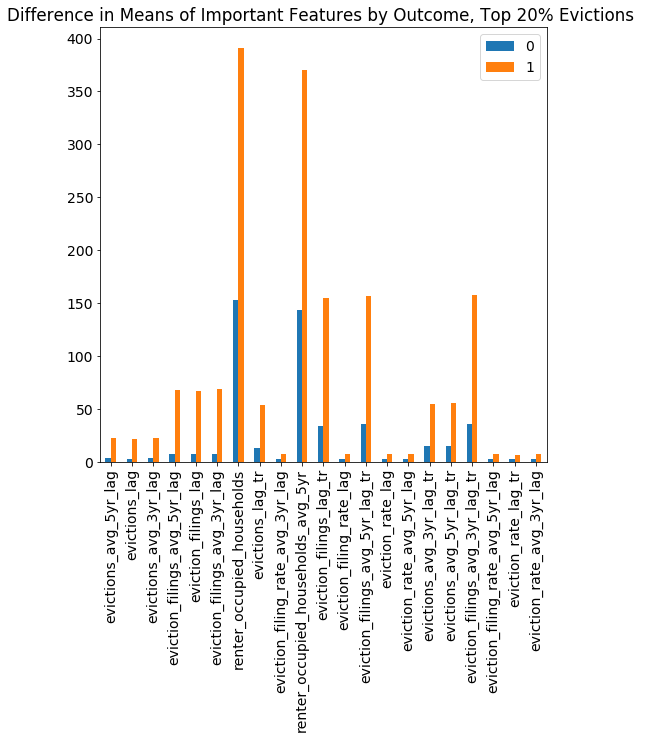

In [45]:
# Difference of means for top 20 outcome
cols_dm = imp_feat_top + ['label_value']

df = top_df[cols_dm]
df_gp = df.groupby(['label_value']).mean()
X = list(df_gp.columns)

Y = df_gp.iloc[0]
Z = df_gp.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()
plt.title("Difference in Means of Important Features by Outcome, Top 20% Evictions ")

plt.show()

In [46]:
bias_cols = ["pct_renter_occupied", "pct_white", "pct_af_am", "pct_hispanic", "pct_am_ind", "pct_asian", "pct_nh_pi",
  "pct_multiple", "pct_other","renter_occupied_households", "median_household_income", "median_property_value",'pred']

In [47]:
top_bias = top_df[bias_cols]

In [48]:
top_bias.head()

,pct_renter_occupied,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,renter_occupied_households,median_household_income,median_property_value,pred
0,52.56,33.95,52.26,6.63,2.12,1.91,0.00,3.14,0.0,628,51840,158200,1
1,53.06,15.12,50.97,21.42,4.96,1.61,1.15,4.78,0.0,655,28049,106900,1
2,58.02,15.75,63.75,8.38,0.00,5.67,0.00,6.46,0.0,717,33063,153300,1
3,69.09,9.28,87.70,3.02,0.00,0.00,0.00,0.00,0.0,829,33397,84200,1
4,62.56,32.82,40.80,25.14,0.00,0.00,0.00,1.25,0.0,494,38250,110000,1


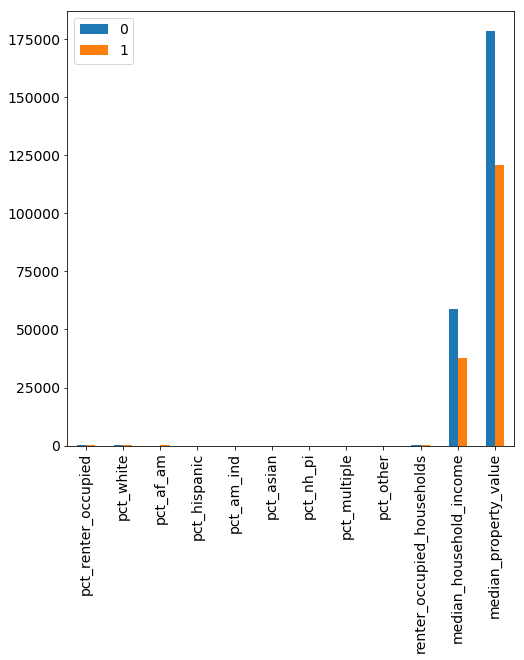

In [49]:
# Difference of means for top 20 outcome for bias columns
df_bias_gp = top_bias.groupby(['pred']).mean()
X = list(df_bias_gp.columns)

Y = df_bias_gp.iloc[0]
Z = df_bias_gp.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()

plt.show()

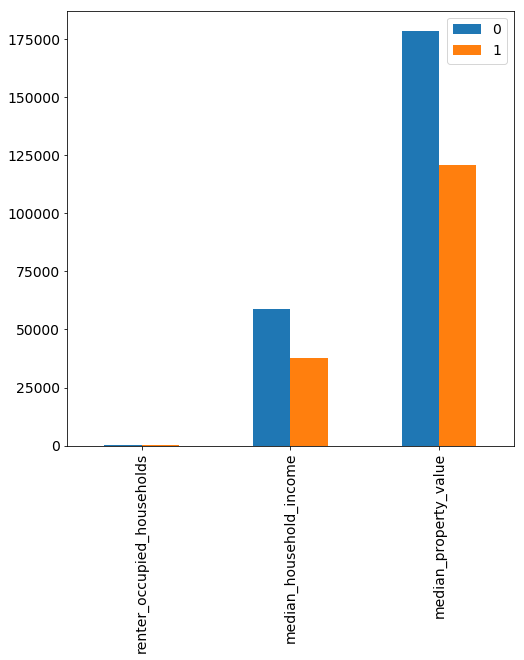

In [50]:
top_bias_count = top_df[["renter_occupied_households", "median_household_income", "median_property_value", "pred"]]
df_bias_count_gp = top_bias_count.groupby(['pred']).mean()
X = list(df_bias_count_gp.columns)

Y = df_bias_count_gp.iloc[0]
Z = df_bias_count_gp.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()

plt.show()

In [51]:
df_bias_gp = top_bias.groupby('pred').mean()

In [52]:
df_bias_gp.to_csv("group_compare.csv")

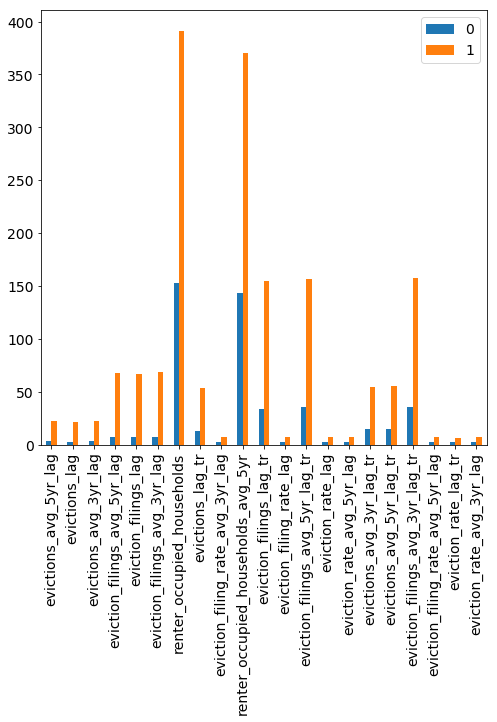

In [53]:
# Difference of means for top 20 outcome for bias columns
cols_dm = imp_feat_top + ['label_value']

df = top_df[cols_dm]
df_gp = df.groupby(['label_value']).mean()
X = list(df_gp.columns)

Y = df_gp.iloc[0]
Z = df_gp.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()

plt.show()

In [58]:
cols_fc = imp_feat_top + ['score']

df_fc = top_df[cols_fc]
corr_table =df_fc.corr()

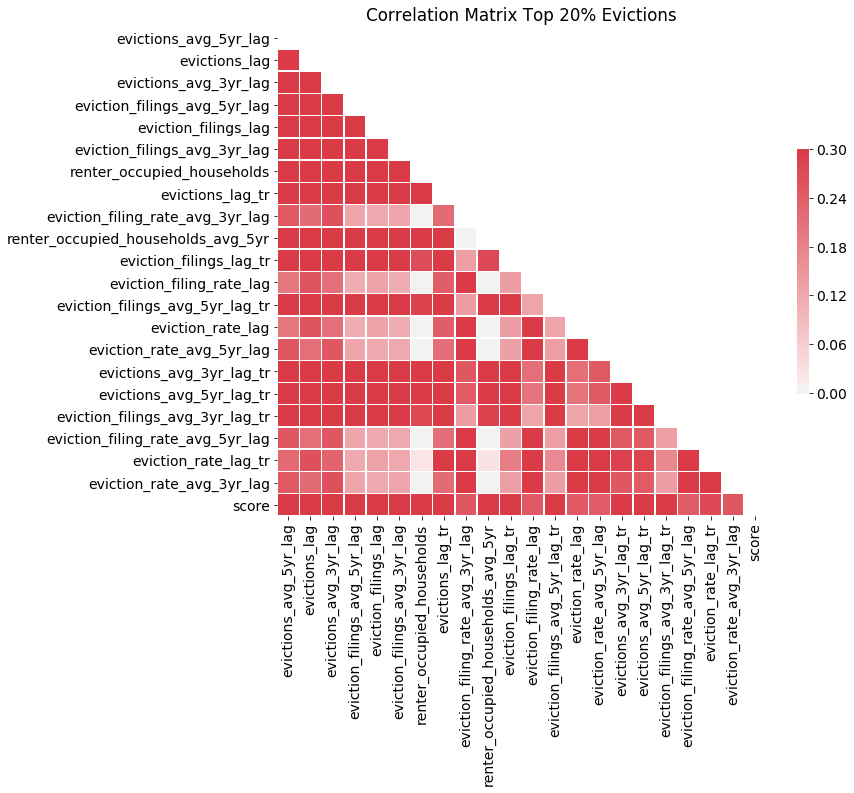

In [59]:
# Colored correlation matrix for display
mask = np.zeros_like(corr_table, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_table, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix Top 20% Evictions")

plt.show()

In [60]:
imp_feat_chg = list(change_fi['feature'][0:21])

In [61]:
imp_feat_chg

['eviction_filing_rate_pct_change_1yr_lag',
 'evictions_pct_change_1yr_lag',
 'eviction_rate_pct_change_1yr_lag',
 'evictions_pct_change_3yr_lag',
 'eviction_filing_rate_pct_change_3yr_lag',
 'eviction_rate_pct_change_3yr_lag',
 'eviction_filing_rate_lag',
 'conversion_rate_lag',
 'eviction_rate_lag',
 'eviction_rate_pct_change_5yr_lag',
 'eviction_filing_rate_pct_change_5yr_lag',
 'evictions_pct_change_5yr_lag',
 'conversion_rate_pct_change_1yr_lag',
 'eviction_filings_avg_5yr_lag',
 'conversion_rate_pct_change_3yr_lag',
 'eviction_filings_avg_3yr_lag',
 'evictions_avg_5yr_lag',
 'conversion_rate_pct_change_5yr_lag',
 'eviction_filings_pct_change_1yr_lag',
 'evictions_lag',
 'evictions_avg_3yr_lag']

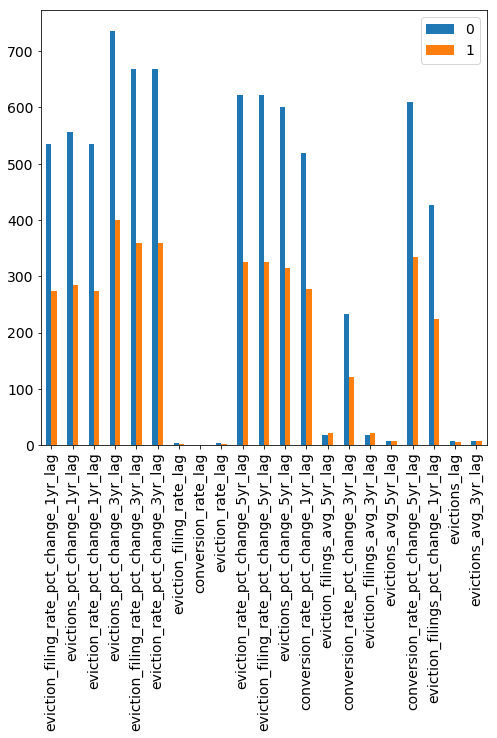

In [62]:
#Difference of means for 20% change outcome
cols_dm = imp_feat_chg + ['label_value']

df = change_df[cols_dm]
df_gp = df.groupby(['label_value']).mean()
X = list(df_gp.columns)

Y = df_gp.iloc[0]
Z = df_gp.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()

plt.show()

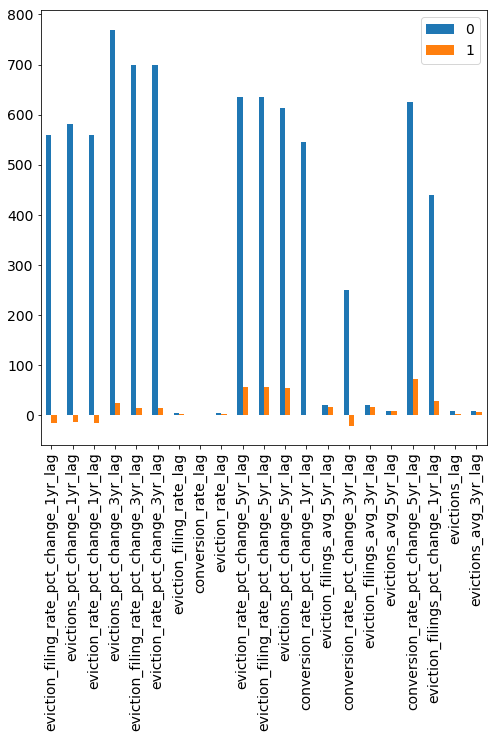

In [63]:
#Difference of means for 20% change outcome
cols_dm = imp_feat_chg + ['pred']

df = change_df[cols_dm]
df_gp_pred = df.groupby(['pred']).mean()
X = list(df_gp_pred.columns)

Y = df_gp_pred.iloc[0]
Z = df_gp_pred.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()

plt.show()

In [64]:
df_gp_pred.head()

,eviction_filing_rate_pct_change_1yr_lag,evictions_pct_change_1yr_lag,eviction_rate_pct_change_1yr_lag,evictions_pct_change_3yr_lag,eviction_filing_rate_pct_change_3yr_lag,eviction_rate_pct_change_3yr_lag,eviction_filing_rate_lag,conversion_rate_lag,eviction_rate_lag,eviction_rate_pct_change_5yr_lag,...,evictions_pct_change_5yr_lag,conversion_rate_pct_change_1yr_lag,eviction_filings_avg_5yr_lag,conversion_rate_pct_change_3yr_lag,eviction_filings_avg_3yr_lag,evictions_avg_5yr_lag,conversion_rate_pct_change_5yr_lag,eviction_filings_pct_change_1yr_lag,evictions_lag,evictions_avg_3yr_lag
pred,,,,,,,,,,,,,,,,,,,,,
0,559.850653,581.589195,559.850653,768.628471,698.132829,698.132829,3.943678,0.499183,3.943678,635.705243,...,613.269443,545.284342,20.237601,248.810267,20.306219,7.474456,624.491286,438.522051,7.919788,7.343379
1,-15.811711,-13.448408,-15.811711,23.221234,13.989705,13.989705,1.166785,0.247589,1.166785,56.634784,...,53.252642,-0.850422,17.016372,-20.908681,16.943965,7.163947,72.563885,27.758257,2.434085,6.930026


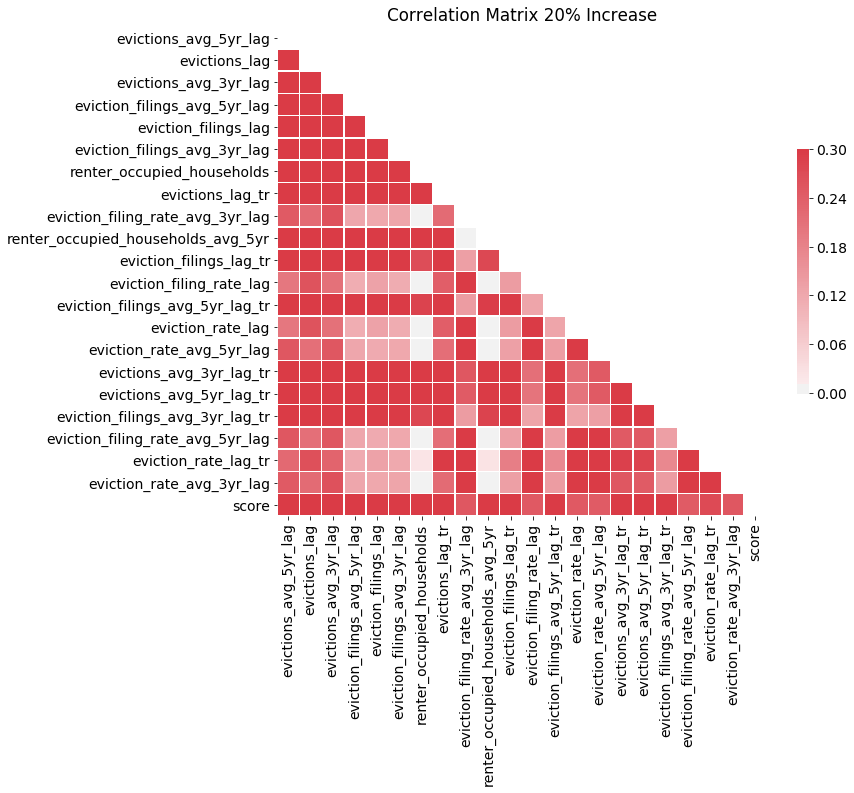

In [65]:
# Colored correlation matrix for display
mask = np.zeros_like(corr_table, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_table, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix 20% Increase")

plt.show()